<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web

SID = 'GIS'#'^TWII'
df = web.DataReader(SID,'yahoo',start="2000-01-01")
df = df.iloc[:,:5]
df

,High,Low,Open,Close,Volume
Date,,,,,
2000-01-03,17.750000,17.031250,17.687500,17.218750,2078200.0
2000-01-04,17.218750,16.781250,17.031250,16.906250,1546800.0
2000-01-05,17.093750,16.593750,16.593750,16.812500,2018800.0
2000-01-06,17.000000,16.468750,16.781250,16.781250,3292600.0
2000-01-07,17.281250,16.750000,17.218750,16.812500,4529000.0
...,...,...,...,...,...
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0


In [11]:
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [12]:
print(df.shape)
df.head(3)

(5673, 5)


,High,Low,Open,Close,Volume
Date,,,,,
2000-01-03,17.75000,17.03125,17.68750,17.21875,2078200.0
2000-01-04,17.21875,16.78125,17.03125,16.90625,1546800.0
2000-01-05,17.09375,16.59375,16.59375,16.81250,2018800.0


In [13]:
df.tail(3)

,High,Low,Open,Close,Volume
Date,,,,,
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0


# Labeling(計算return)

In [14]:
#今天股價 = df['Close']
#昨天股價 = df['Close'].shift(1)
#df['return%'] = (今天股價/昨天股價-1)*100
#print(df['return%'].min(),df['return%'].max())
#sns.distplot(df['return%'].dropna())
#df.tail()

# Label triple_barrier

In [15]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)

In [16]:
df.tail(20)

,High,Low,Open,Close,Volume,triple_barrier_signal
Date,,,,,,
2022-06-22,68.440002,67.339996,67.809998,67.900002,4137500.0,1
2022-06-23,69.160004,67.989998,68.269997,68.980003,3461400.0,0
2022-06-24,70.739998,68.820000,69.250000,70.629997,4449000.0,0
2022-06-27,71.110001,70.230003,70.570000,71.040001,2875600.0,0
2022-06-28,71.709999,70.080002,71.139999,70.260002,3694900.0,0
2022-06-29,75.000000,71.500000,71.529999,74.720001,10605400.0,0
2022-06-30,75.739998,73.900002,74.000000,75.449997,8255000.0,0
2022-07-01,75.959999,74.820000,75.820000,75.790001,5352300.0,0
2022-07-05,76.089996,74.050003,75.620003,75.150002,6006800.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


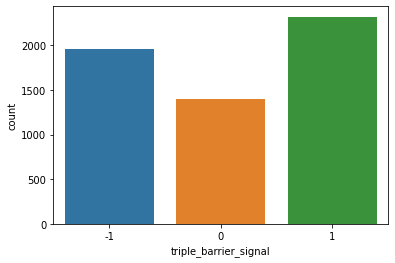

In [17]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

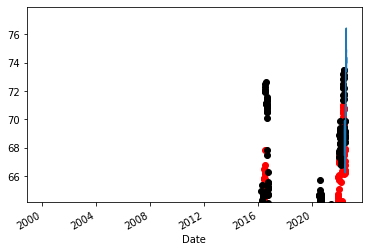

In [18]:
import matplotlib.pyplot as plt
buy = df[df['triple_barrier_signal']==1]['Close']
sell = df[df['triple_barrier_signal']==-1]['Close']
df['Close'][-40:].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
lb = df['Close'][-40:].mean() - 2*df['Close'][-40:].std()
ub = df['Close'][-40:].mean() + 2*df['Close'][-40:].std()
plt.ylim(lb,ub)
plt.show()

# 建立ohlcv

In [19]:
#!pip install finta

In [20]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count    5672.000000
mean       51.856890
std        11.419323
min         0.000000
25%        44.093517
50%        52.304612
75%        60.028859
max        86.353588
Name: RSI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360


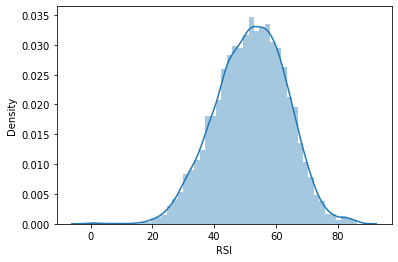

In [21]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    5660.000000
mean      -45.197894
std        29.732896
min      -100.000000
25%       -71.119077
50%       -42.359001
75%       -18.202895
max        -0.000000
Name: Williams %R, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609


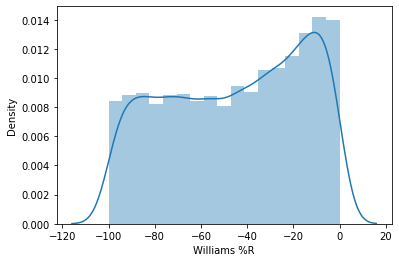

In [22]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count    5633.000000
mean       39.571403
std        15.170891
min        15.794970
25%        24.709146
50%        36.922195
75%        53.322927
max        71.380731
Name: SMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878


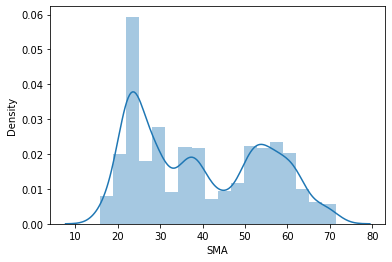

In [23]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count    5673.000000
mean       39.564231
std        15.320287
min        15.260014
25%        24.686247
50%        37.122146
75%        53.318029
max        75.128655
Name: EMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190


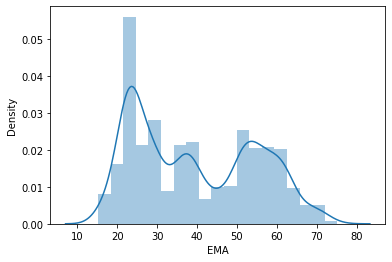

In [24]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count    5665.000000
mean       39.609941
std        15.319464
min        15.216667
25%        24.697111
50%        37.143555
75%        53.405777
max        75.860001
Name: WMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889


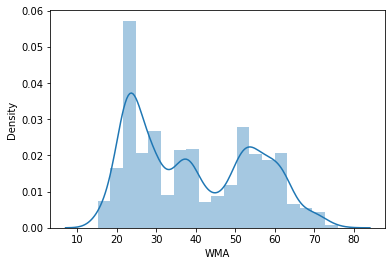

In [25]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count    5655.000000
mean       39.672234
std        15.325741
min        14.984339
25%        24.752127
50%        37.188439
75%        53.449145
max        77.320046
Name: HMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689


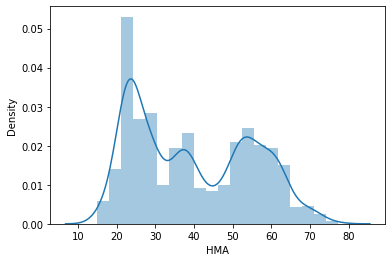

In [26]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count    5673.000000
mean       39.605394
std        15.356636
min        15.043455
25%        24.716466
50%        37.167751
75%        53.410790
max        76.828799
Name: TEMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538


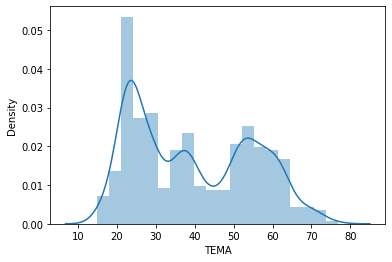

In [27]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    5672.000000
mean       13.043020
std       111.231363
min      -531.363876
25%       -68.351104
50%        22.304327
75%        97.635942
max       374.926505
Name: CCI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742


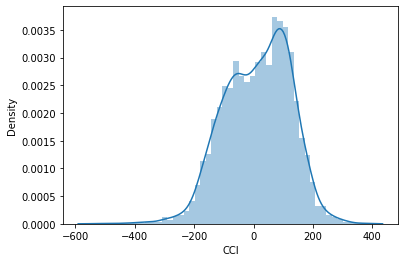

In [28]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    5672.000000
mean        3.943663
std        27.037622
min      -100.000000
25%       -14.551357
50%         4.934039
75%        23.480677
max        85.119031
Name: CMO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681,16.853938
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262,19.281863
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411,4.353705
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467,9.785563
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742,-4.178664


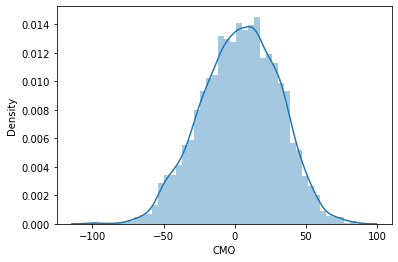

In [29]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    5673.000000
mean        0.001068
std         0.154789
min        -0.747413
25%        -0.075954
50%        -0.001465
75%         0.079985
max         0.997284
Name: MACD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681,16.853938,0.245367
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262,19.281863,0.112119
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411,4.353705,-0.053890
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467,9.785563,-0.142899
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742,-4.178664,-0.267363


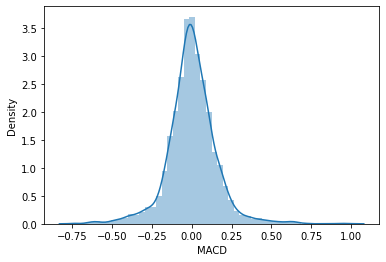

In [30]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    5673.000000
mean        0.001526
std         0.368297
min        -1.797826
25%        -0.215466
50%        -0.010409
75%         0.224846
max         1.733034
Name: PPO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681,16.853938,0.245367,0.318142
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262,19.281863,0.112119,0.134473
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411,4.353705,-0.053890,-0.091317
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467,9.785563,-0.142899,-0.212081
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742,-4.178664,-0.267363,-0.379620


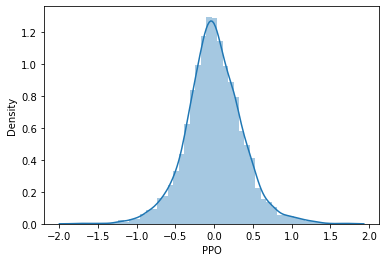

In [31]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    5661.000000
mean        0.392417
std         3.824984
min       -14.956829
25%        -1.753084
50%         0.408056
75%         2.479107
max        21.775506
Name: ROC, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681,16.853938,0.245367,0.318142,5.152021
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262,19.281863,0.112119,0.134473,6.632502
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411,4.353705,-0.053890,-0.091317,-1.030520
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467,9.785563,-0.142899,-0.212081,-1.431404
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742,-4.178664,-0.267363,-0.379620,-3.153449


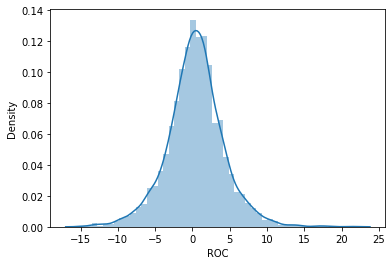

In [32]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    5.664000e+03
mean    -1.240301e+08
std      1.062496e+08
min     -4.295345e+08
25%     -1.266767e+08
50%     -9.121813e+07
75%     -6.740696e+07
max      6.391118e+07
Name: CFI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681,16.853938,0.245367,0.318142,5.152021,-2.267981e+08
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262,19.281863,0.112119,0.134473,6.632502,-2.263337e+08
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411,4.353705,-0.053890,-0.091317,-1.030520,-2.264249e+08
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467,9.785563,-0.142899,-0.212081,-1.431404,-2.262689e+08
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742,-4.178664,-0.267363,-0.379620,-3.153449,-2.267735e+08


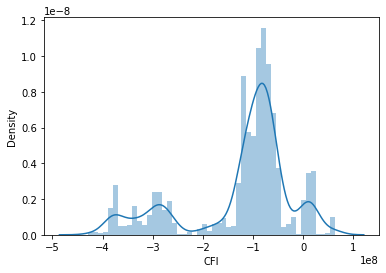

In [33]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    5660.000000
mean        0.539114
std        12.816594
min       -65.019570
25%        -7.385695
50%         0.955721
75%         9.329774
max        52.073974
Name: DMI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681,16.853938,0.245367,0.318142,5.152021,-2.267981e+08,7.998730
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262,19.281863,0.112119,0.134473,6.632502,-2.263337e+08,7.427392
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411,4.353705,-0.053890,-0.091317,-1.030520,-2.264249e+08,3.392790
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467,9.785563,-0.142899,-0.212081,-1.431404,-2.262689e+08,3.150448
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742,-4.178664,-0.267363,-0.379620,-3.153449,-2.267735e+08,-2.995260


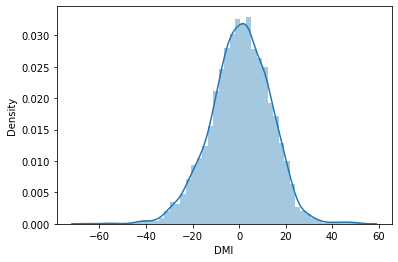

In [34]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count    5673.000000
mean       39.474078
std        15.329530
min        14.687500
25%        24.648113
50%        36.915999
75%        53.269679
max        76.940002
Name: SAR, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-14,75.769997,74.290001,75.150002,74.699997,4554700.0,0,59.816348,-27.586265,70.540732,75.042924,...,76.727122,75.908412,49.973681,16.853938,0.245367,0.318142,5.152021,-2.267981e+08,7.998730,76.940002
2022-07-15,75.470001,74.660004,75.260002,74.919998,3174400.0,0,60.633918,-29.446124,70.576342,75.018338,...,76.300370,75.472990,46.891262,19.281863,0.112119,0.134473,6.632502,-2.263337e+08,7.427392,76.940002
2022-07-18,74.970001,73.879997,74.529999,73.949997,2671700.0,0,55.292310,-43.586082,70.601707,74.804670,...,75.735207,74.701986,26.662411,4.353705,-0.053890,-0.091317,-1.030520,-2.264249e+08,3.392790,76.834002
2022-07-19,74.900002,74.139999,74.269997,74.370003,3019900.0,0,57.056407,-47.242620,70.767561,74.717737,...,75.196312,74.410776,25.885467,9.785563,-0.142899,-0.212081,-1.431404,-2.262689e+08,3.150448,76.656762
2022-07-20,74.620003,73.050003,74.430000,73.400002,3584600.0,0,51.957360,-91.002609,70.944878,74.454190,...,74.624689,73.760538,-3.390742,-4.178664,-0.267363,-0.379620,-3.153449,-2.267735e+08,-2.995260,76.490156


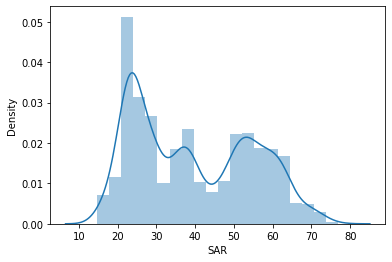

In [35]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [36]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #取15個剛剛建立的技術指標當特徵
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(5673, 21)
(5633, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-07-14,59.816348,-27.586265,70.540732,75.042924,75.649555,76.727122,75.908412,49.973681,16.853938,0.245367,0.318142,5.152021,-2.267981e+08,7.998730,76.940002,0
2022-07-15,60.633918,-29.446124,70.576342,75.018338,75.499777,76.300370,75.472990,46.891262,19.281863,0.112119,0.134473,6.632502,-2.263337e+08,7.427392,76.940002,0
2022-07-18,55.292310,-43.586082,70.601707,74.804670,75.175332,75.735207,74.701986,26.662411,4.353705,-0.053890,-0.091317,-1.030520,-2.264249e+08,3.392790,76.834002,0
2022-07-19,57.056407,-47.242620,70.767561,74.717737,74.961555,75.196312,74.410776,25.885467,9.785563,-0.142899,-0.212081,-1.431404,-2.262689e+08,3.150448,76.656762,0
2022-07-20,51.957360,-91.002609,70.944878,74.454190,74.594889,74.624689,73.760538,-3.390742,-4.178664,-0.267363,-0.379620,-3.153449,-2.267735e+08,-2.995260,76.490156,0


# 相關性分析

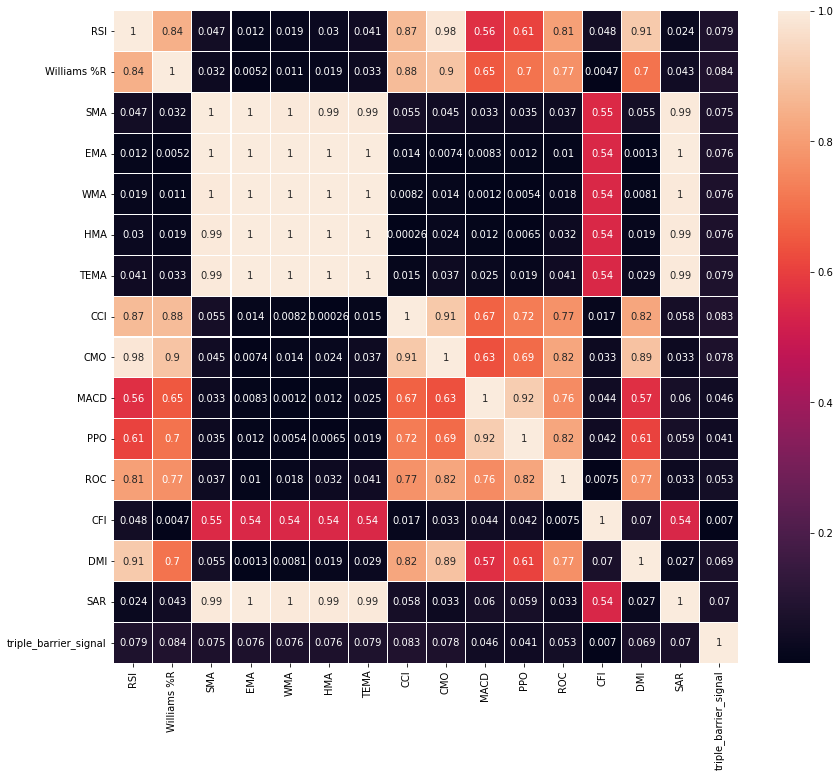

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,
                         index = df.index,
                         columns = df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-07-14,0.621076,0.724137,0.984888,0.998557,0.996507,0.990420,0.985033,0.641447,0.578570,0.569027,0.599278,0.547443,0.410859,0.623589,1.000000,0
2022-07-15,0.632750,0.705539,0.985529,0.998143,0.994020,0.983526,0.977952,0.638046,0.593559,0.492654,0.547260,0.587747,0.411800,0.618710,1.000000,0
2022-07-18,0.556478,0.564139,0.985985,0.994547,0.988635,0.974395,0.965414,0.615726,0.501401,0.397504,0.483313,0.379129,0.411615,0.584254,0.998284,0
2022-07-19,0.581667,0.527574,0.988969,0.993083,0.985086,0.965688,0.960679,0.614868,0.534934,0.346486,0.449110,0.368216,0.411931,0.582184,0.995416,0
2022-07-20,0.508858,0.089974,0.992159,0.988647,0.978999,0.956453,0.950105,0.582565,0.448727,0.275148,0.401660,0.321335,0.410909,0.529699,0.992719,0


In [39]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [40]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
b_index = 0
f_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(b_index ,f_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,
                 df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 5619/5619 [00:06<00:00, 926.30it/s]


準備完成


# check

In [41]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 5619
第一筆的index開始和結束:2000-03-01-2000-03-21
最後一筆的index開始和結束:2022-06-29-2022-07-20


# Reshape X

(圖片數量,長,寬,1張)

In [42]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(5619, 15, 15)
(5619, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [43]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(5619, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]
(5619, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Visualization

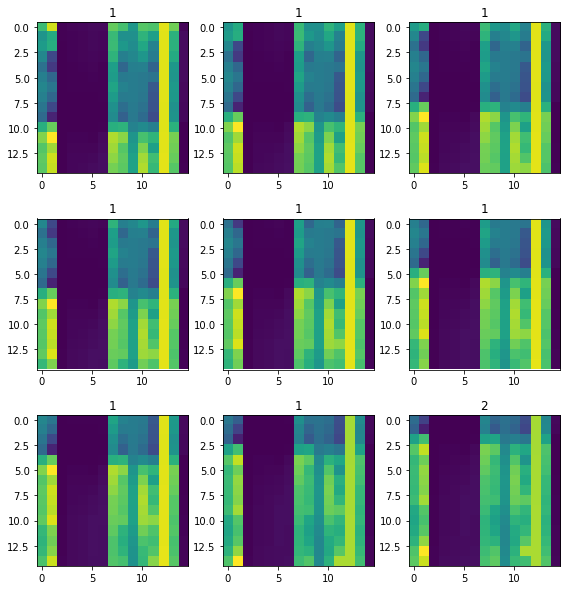

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [45]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(5579, 15, 15, 1) (5579, 3) (40, 15, 15, 1)


# 調整採樣

In [46]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(5579, 225)
(5579,)
0    1378
1    1378
2    1378
Name: 0, dtype: int64
(4134, 15, 15, 1)
(4134, 3)


# Split training and val sets

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X_train,
                                              y_train, 
                                              test_size = 0.2,
                                              random_state = 42,
                                              shuffle = True,#是否洗牌
                                              stratify = y_train #是否根據y欄位做分層取樣
                                             )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(3307, 15, 15, 1) (3307, 3) (827, 15, 15, 1) (827, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [48]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    2293
2    1929
0    1397
dtype: int64

In [49]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    1378
1    1378
2    1378
dtype: int64

In [50]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    1103
1    1102
0    1102
dtype: int64

In [51]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

1    276
0    276
2    275
dtype: int64

# CNN

In [52]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [53]:
model = Sequential()

nclasses = 3 

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                        

In [54]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [55]:
#1
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc', 
                                 factor=0.5, 
                                 patience = 3, 
                                 verbose = 1, 
                                 min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [56]:
history = model.fit(xtrain,ytrain,
                    batch_size = 128,
                    epochs = 500,
                    validation_data=(xval,yval),
                    verbose=1,callbacks=[es])

Epoch 1/500
26/26 [==============================] - 13s 20ms/step - loss: 1.1045 - accuracy: 0.3293 - val_loss: 1.0981 - val_accuracy: 0.3325
Epoch 2/500
26/26 [==============================] - 0s 8ms/step - loss: 1.0997 - accuracy: 0.3338 - val_loss: 1.0978 - val_accuracy: 0.4172
Epoch 3/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0984 - accuracy: 0.3517 - val_loss: 1.0976 - val_accuracy: 0.3628
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0997 - accuracy: 0.3266 - val_loss: 1.0977 - val_accuracy: 0.3664
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0986 - accuracy: 0.3338 - val_loss: 1.0964 - val_accuracy: 0.3942
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0966 - accuracy: 0.3529 - val_loss: 1.0954 - val_accuracy: 0.4051
Epoch 7/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0966 - accuracy: 0.3601 - val_loss: 1.0940 - val_accuracy: 0.4244
Epoch 8/500

# 訓練過程評估

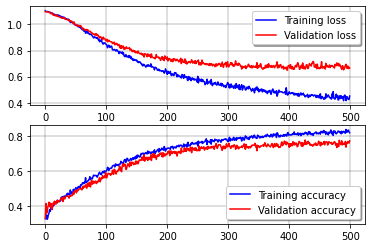

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

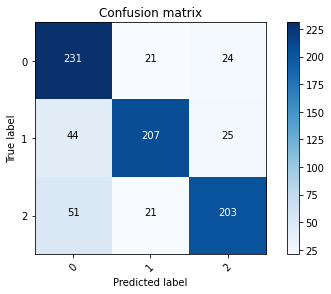

In [58]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [59]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


真實y值

In [60]:
print(yval[:5])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# 分類報告

In [61]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.7750906892382105

In [62]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.71      0.84      0.77       276
         BUY       0.83      0.75      0.79       276
        SELL       0.81      0.74      0.77       275

   micro avg       0.78      0.78      0.78       827
   macro avg       0.78      0.78      0.78       827
weighted avg       0.78      0.78      0.78       827
 samples avg       0.78      0.78      0.78       827



# plot error

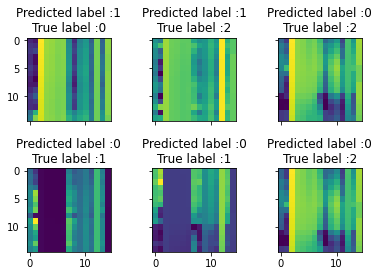

In [63]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [64]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

40


# 0~20筆

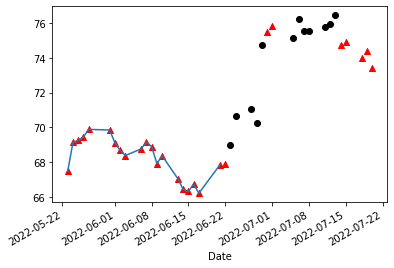

In [65]:
INDEX60 = df[-60:].index
C = web.DataReader(SID,'yahoo',start="2000-01-01")[['Close']]
C = C.loc[INDEX60,:]
C['SIGNAL'] = [np.nan for _ in range(20)] + answer #20個NAN+預測答案
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'][20:40].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 20~40筆

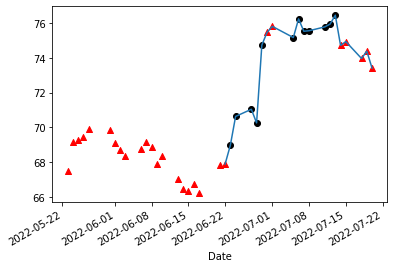

In [66]:
C['Close'][40:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 合併

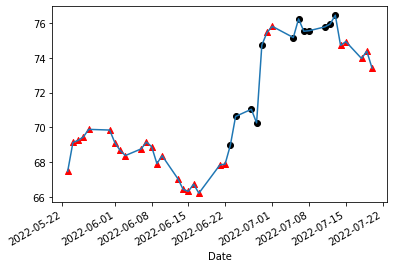

In [67]:
C['Close'][20:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 平滑版本

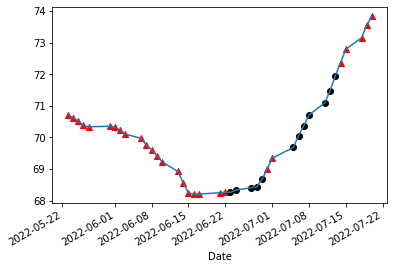

In [68]:
C_roll20 = pd.DataFrame(index=C.index)#空的dataframe index = 倒數60天股票日期
C_roll20['Close'] = C['Close'].rolling(20).mean()#收盤價做20天平滑
C_roll20['SIGNAL'] = C['SIGNAL']
buy = C_roll20[C_roll20['SIGNAL']==1]['Close']#買點
sell= C_roll20[C_roll20['SIGNAL']==2]['Close']#賣點
C_roll20['Close'][20:].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [69]:
C = C.dropna(axis=0)
C

,Close,SIGNAL
Date,,
2022-05-23,67.480003,1.0
2022-05-24,69.139999,1.0
2022-05-25,69.260002,1.0
2022-05-26,69.459999,1.0
2022-05-27,69.889999,1.0
2022-05-31,69.849998,1.0
2022-06-01,69.120003,1.0
2022-06-02,68.680000,1.0
2022-06-03,68.389999,1.0


In [70]:
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.tail(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,SIGNAL,HOLD%,BUY%,SELL%
Date,,,,,
2022-05-23,67.480003,1.0,2.918664e-13,1.000000,4.906318e-13
2022-05-24,69.139999,1.0,6.297053e-12,1.000000,5.048861e-09
2022-05-25,69.260002,1.0,1.742361e-10,1.000000,5.451837e-09
2022-05-26,69.459999,1.0,3.816486e-20,1.000000,6.790457e-14
2022-05-27,69.889999,1.0,2.017454e-14,1.000000,3.273156e-08
2022-05-31,69.849998,1.0,3.441160e-16,1.000000,1.554030e-07
2022-06-01,69.120003,1.0,3.246277e-16,1.000000,5.654629e-09
2022-06-02,68.680000,1.0,1.991887e-16,1.000000,3.194027e-13
2022-06-03,68.389999,1.0,8.017744e-23,1.000000,6.452629e-13


In [71]:
14733 - 14464

269

In [72]:
def 勝率(df):
  t = []
  for i,idx in enumerate(df.index):
    訊號 = np.argmax(df.iloc[i,-3:])
    if 訊號 == 1:#buy
      try:
        點差 = df.iloc[i+1,0] - df.iloc[i,0]
        if 點差>0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 2:#sell
      try:
        點差 = df.iloc[i,0] - df.iloc[i+1,0]
        if 點差<0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 0:#hold
      pass
  return np.mean(t)
#C['Close'].shift()-C['Close'],len(C['Close'].shift()-C['Close'])
勝率(df)

0.5886714116251482

In [73]:
t = []
for i in range(len(C)):
  signal = np.argmax(C.iloc[i,-3:])
  if signal == 2:
    signal = -1
    t.append(signal)
  if signal == 1:
    signal = 1
    t.append(signal)
  if signal == 0:
    t.append(signal)
t,len(t)

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  1],
 40)

In [74]:
a = (C['Close'].shift()-C['Close']).values*t
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
賠率 = 1-勝率(df)
print(勝率(df),平均獲利,賠率,平均損失)
分子 = 勝率(df)*平均獲利
分母 =  賠率*平均損失*-1
print(分子,分母)
盈虧比 = (分子)/(分母)
盈虧比

0.5886714116251482 0.47564110389122594 0.41132858837485176 -0.24487187312199518
0.27999632005459174 0.10072280190397608


2.7798702454834983

In [75]:
賠率

0.41132858837485176

# save model

In [76]:
model.save('Rikcy_net.h5')
del model

In [77]:
from keras.models import load_model
model = load_model('Rikcy_net.h5')
predict = model.predict(X_test)

In [78]:
predict[-5:]

array([[0.00000017, 0.9139526 , 0.08604721],
       [0.00000083, 0.83849514, 0.16150406],
       [0.00000004, 0.95360774, 0.04639222],
       [0.00000021, 0.938553  , 0.06144676],
       [0.00000078, 0.97483546, 0.02516374]], dtype=float32)